<a href="https://colab.research.google.com/github/phantommarheaven7621/COVID19_Face_Mask_Detection/blob/main/COVID19_Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download prithwirajmitra/covid-face-mask-detection-dataset

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Explore the data

In [1]:
# Paths of directories

import os

base_dir = '/content/New Masks Dataset'

train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

# Mask and None Mask for train_dir
train_mask_dir = os.path.join(train_dir, 'Mask')
train_nonmask_dir = os.path.join(train_dir, 'Non Mask')

# Mask and None Mask for val_dir
val_mask_dir = os.path.join(val_dir, 'Mask')
val_nonmask_dir = os.path.join(val_dir, 'Non Mask')

# Mask and None Mask for test_dir
test_mask_dir = os.path.join(test_dir, 'Mask')
test_nonmask_dir = os.path.join(test_dir, 'Non Mask')

In [2]:
# List of file names

train_mask_fnames = os.listdir(train_mask_dir)
train_nonmask_fnames = os.listdir(train_nonmask_dir)
val_mask_fnames = os.listdir(val_mask_dir)
val_nonmask_fnames = os.listdir(val_nonmask_dir)
test_mask_fnames = os.listdir(test_mask_dir)
test_nonmask_fnames = os.listdir(test_nonmask_dir)

print('Training mask: {} images'.format(len(train_mask_fnames)))
print('Training non mask: {} images\n'.format(len(train_mask_fnames)))
print('Validation mask: {} images'.format(len(val_mask_fnames)))
print('Validation non mask: {} images\n'.format(len(val_mask_fnames)))
print('Testing mask: {} images'.format(len(test_mask_fnames)))
print('Testing non mask: {} images\n'.format(len(test_mask_fnames)))

Training mask: 300 images
Training non mask: 300 images

Validation mask: 153 images
Validation non mask: 153 images

Testing mask: 50 images
Testing non mask: 50 images



In [3]:
train_mask_fnames[:5]

['0110.jpg', '1553.jpg', '1136.jpg', '0116.png', '0583.jpg']

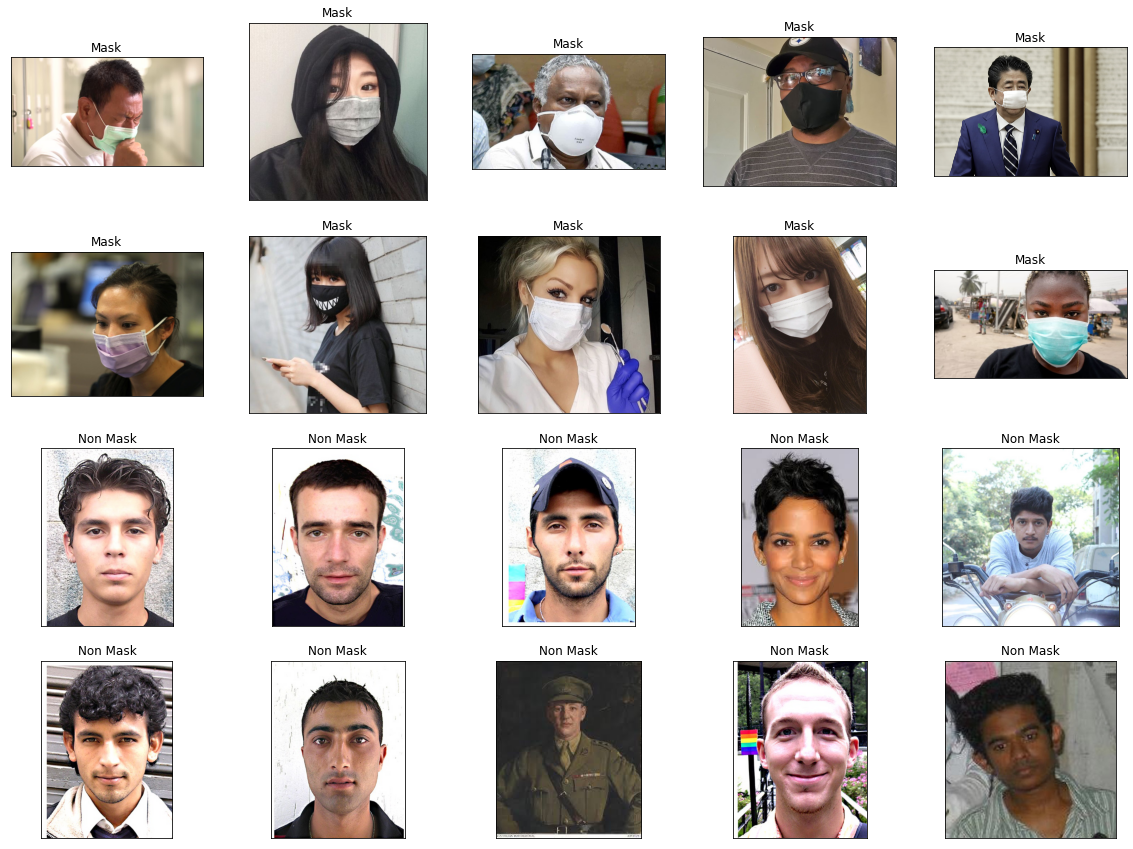

In [4]:
import matplotlib.pyplot as plt
import PIL.Image as Image

# Take 10 images from train mask and 10 images from train non mask
train_show = []
for i in range(10):
  train_show.append(os.path.join(train_mask_dir, train_mask_fnames[i]))

for i in range(10):
  train_show.append(os.path.join(train_nonmask_dir, train_nonmask_fnames[i]))

# Show these 20 images using matplotlib
n_rows = 4
n_cols = 5 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(20,15))

count = 0

for i in range(n_rows):
  for j in range(n_cols):
    img = Image.open(train_show[count])
    ax[i, j].imshow(img)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    if count < 10:
      ax[i, j].set_title('Mask')
    else:
      ax[i, j].set_title('Non Mask')
    count += 1

# Build a ConvNet from scratch

In [5]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [6]:
# define a model

inputs = Input(shape=(150, 150, 3))

# first layer
x = Conv2D(16, 3, activation='relu')(inputs)
x = MaxPooling2D(2)(x)

# second layer
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# third layer
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# dense layer
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

# model
model = Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [8]:
# compile model
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Prepare data

In [9]:
# training and validation data preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    seed=11,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [10]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'Mask': 0, 'Non Mask': 1}
{'Mask': 0, 'Non Mask': 1}


In [11]:
# test data preprocessing
import numpy as np
from sklearn.utils import shuffle

test_data = []
test_labels = []

def convert_to_data(dir, fnames, data, labels, value_of_labels):
  for i, name in enumerate(fnames):
    path = os.path.join(dir, name)
    img = Image.open(path).resize((150, 150))
    img = np.array(img)
    data.append(img)
    labels.append(value_of_labels)
  

convert_to_data(test_mask_dir, test_mask_fnames, test_data, test_labels, 0)
convert_to_data(test_nonmask_dir, test_nonmask_fnames, test_data, test_labels, 1)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

test_data, test_labels = shuffle(test_data, test_labels, random_state=0)

print('Test data: {}'.format(len(test_data)))
print('Test labels: {}\n'.format(len(test_labels)))


Test data: 100
Test labels: 100



# **Training**

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=15,
    validation_data=val_generator,
    validation_steps=15,
    verbose=1
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
30/30 [==============================] - 24s 757ms/step - loss: 0.6740 - accuracy: 0.5617 - val_loss: 0.6326 - val_accuracy: 0.7300
Epoch 2/15
30/30 [==============================] - 23s 751ms/step - loss: 0.5038 - accuracy: 0.8183 - val_loss: 0.4823 - val_accuracy: 0.7767
Epoch 3/15
30/30 [==============================] - 22s 737ms/step - loss: 0.3364 - accuracy: 0.8750 - val_loss: 0.4127 - val_accuracy: 0.8267
Epoch 4/15
30/30 [==============================] - 22s 736ms/step - loss: 0.3151 - accuracy: 0.8683 - val_loss: 0.2895 - val_accuracy: 0.8867
Epoch 5/15
30/30 [==============================] - 22s 735ms/step - loss: 0.2392 - accuracy: 0.9067 - val_loss: 0.2630 - val_accuracy: 0.9033
Epoch 6/15
30/30 [==============================] - 22s 737ms/step - loss: 0.2233 - accuracy: 0.9100 - val_loss: 0.2607 - val_accuracy: 0.8967
Epoch 7/15
30/30 [==============================] - 22s 741ms/step - loss: 0.2012 - accuracy: 0.9200 - val_loss: 0.2634 - val_accuracy: 0.9000

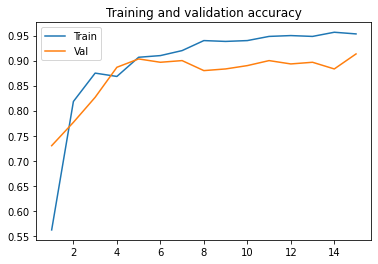

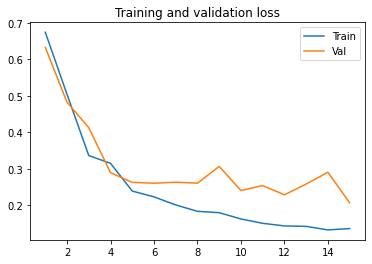

In [13]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(1, len(acc)+1)

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Train')
plt.plot(epochs, val_acc, label='Val')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Train')
plt.plot(epochs, val_loss, label='Val')
plt.title('Training and validation loss')
plt.legend()

In [14]:
model.evaluate(train_generator)

30/30 [==============================] - 8s 279ms/step - loss: 0.1383 - accuracy: 0.9483


[0.13825619220733643, 0.9483333230018616]

In [15]:
model.evaluate(val_generator)

16/16 [==============================] - 7s 430ms/step - loss: 0.2384 - accuracy: 0.9052


[0.2384137213230133, 0.9052287340164185]

# Prediction

In [16]:
# Prediction
test_pred = model.predict(test_data) > 0.5
test_pred = [1 if ([[i]] == [[True]]) else 0 for i in test_pred]

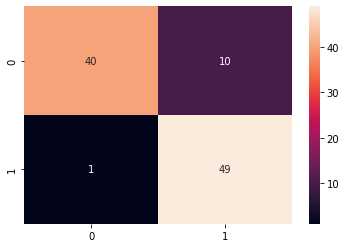

In [17]:
# Import libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(test_labels, test_pred)

sns.heatmap(cm, annot=True, fmt='.3g')

In [18]:
# Accuracy
model.evaluate(test_data, test_labels)

4/4 [==============================] - 1s 130ms/step - loss: 23.2104 - accuracy: 0.8900


[23.210386276245117, 0.8899999856948853]